c:\Users\Filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2034/2034 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 377.6865
Epoch 2/5
2034/2034 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 124.8746
Epoch 3/5
2034/2034 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 121.4500
Epoch 4/5
2034/2034 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 118.0328
Epoch 5/5
2034/2034 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 112.9371


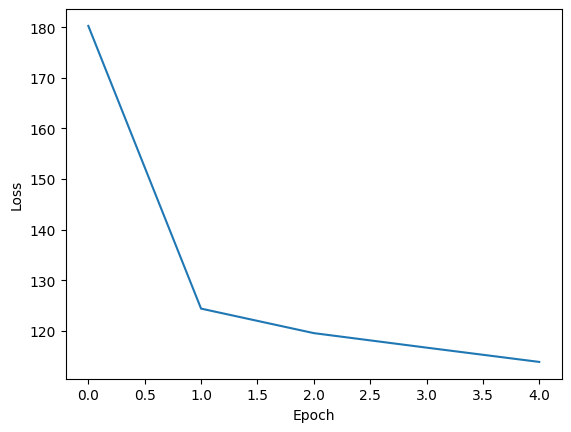

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 113.5591
Loss: 111.75878143310547
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

with open('output_data.json', 'r') as f:
    data = json.load(f)

# each row in data is a list of 6x2 matrix
# first 5 values are input and last is output
X = []
Y = []
for row in data:
    X.append(row[:5])
    Y.append(row[5])

X = np.array(X)
Y = np.array(Y)

n = len(X)
n_train = int(0.9 * n)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
X_test_static = X_test.copy()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(5, 2)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(X_train, Y_train, epochs=5, batch_size=64)

plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

loss = model.evaluate(X_test, Y_test)
print('Loss:', loss)

Y_pred = model.predict(X_test)

In [24]:
def show_result(id):
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.scatter(X_test[id][:, 0], X_test[id][:, 1], label='X_test')
    plt.scatter(Y_test[id][0], Y_test[id][1], color='lightblue', label='Y_test')
    plt.scatter(Y_pred[id][0], Y_pred[id][1], color='orange', label='Y_pred')
    plt.legend()
    plt.show()

# for i in range(10):
#     show_result(i)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


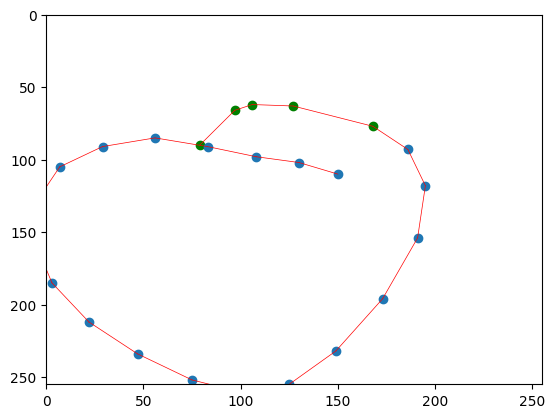

In [ ]:
X_test[0] = X_test_static[0]
every_drawing_points = [X_test[0][0].tolist()]
for i in range(20):
    Y_pred = model.predict(X_test[0].reshape(1, 5, 2))
    # show_result(0)
    if X_test[0][0].tolist() not in every_drawing_points:
        every_drawing_points.append(X_test[0][0].tolist())
    X_test[0] = np.roll(X_test[0], -1, axis=0)
    X_test[0][-1] = Y_pred[0]

for i in X_test[0]:
    every_drawing_points.append(i.tolist())

every_drawing_points = np.array(every_drawing_points)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.scatter(every_drawing_points[:5, 0], every_drawing_points[:5, 1], color='green')
plt.scatter(every_drawing_points[5:, 0], every_drawing_points[5:, 1])
plt.gca().invert_yaxis()

for i in range(len(every_drawing_points) - 1):
    plt.plot(every_drawing_points[i:i+2, 0], every_drawing_points[i:i+2, 1], color='red', linewidth=0.5)

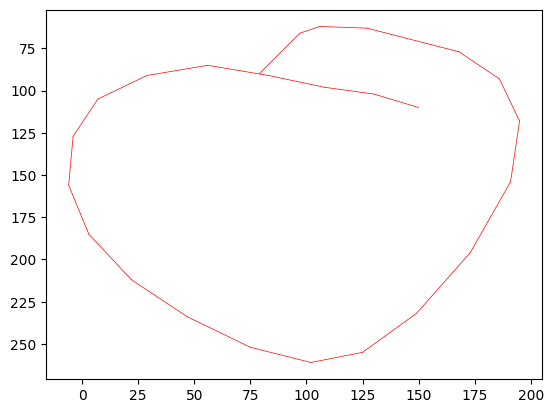

In [ ]:
plt.gca().invert_yaxis()
for i in range(len(every_drawing_points) - 1):
    plt.plot(every_drawing_points[i:i+2, 0], every_drawing_points[i:i+2, 1], color='red', linewidth=0.5)